# Criteria: data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers. This shows in detail about outlier treatment in Python.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# load the dataset
df = pd.read_csv(r"D:\Downloads\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

In [4]:
sample_outliers = detect_outliers_iqr(df['Pregnancies'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [14, 14, 15, 17]


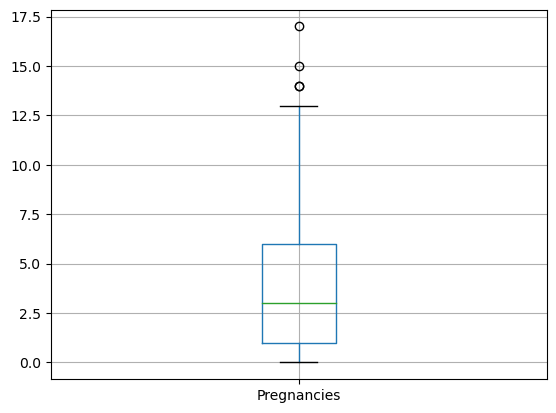

In [5]:
boxplot = df.boxplot(column=['Pregnancies'])